In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
%matplotlib inline

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [39]:
# Code here
from warnings import simplefilter
simplefilter(action = 'ignore' , category = FutureWarning)
from sklearn.datasets import load_breast_cancer
data , target = load_breast_cancer(True)

In [40]:
Data = pd.DataFrame(data , columns = load_breast_cancer().feature_names )
Data['label'] = target
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
Data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
Data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
Data.max() - Data.min()

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.110770
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.047480
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.520000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [6]:
#here we can see that the dependent variable is discrete value. Hence it is classification problem.
#We will use logistic linear regression for this data.
Data.label.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [41]:
x = Data.drop(['label'] , axis = 1)
y = Data['label']

In [8]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [10]:
print(x.isnull().any())
print('\n')
print(y.isnull().any())

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

### Train test split

In [90]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [12]:
x_train.shape

(455, 30)

In [13]:
x_test.shape

(114, 30)

### Apply feature scaling on the data

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
sc.mean_

array([1.41176352e+01, 1.91850330e+01, 9.18822418e+01, 6.54377582e+02,
       9.57440220e-02, 1.03619319e-01, 8.88981451e-02, 4.82798703e-02,
       1.81098681e-01, 6.27567692e-02, 4.02015824e-01, 1.20268681e+00,
       2.85825341e+00, 4.00712989e+01, 6.98907473e-03, 2.56354484e-02,
       3.28236723e-02, 1.18939407e-02, 2.05735121e-02, 3.82045560e-03,
       1.62351033e+01, 2.55356923e+01, 1.07103121e+02, 8.76987033e+02,
       1.31532132e-01, 2.52741802e-01, 2.74594569e-01, 1.14182222e-01,
       2.90502198e-01, 8.38678462e-02])

In [46]:
sc.scale_

array([3.53192761e+00, 4.26131404e+00, 2.42952845e+01, 3.54552925e+02,
       1.39076981e-02, 5.24128055e-02, 7.93805091e-02, 3.80183541e-02,
       2.74570850e-02, 7.20178506e-03, 2.82849558e-01, 5.41151676e-01,
       2.06893139e+00, 4.71843820e+01, 3.05347371e-03, 1.85862970e-02,
       3.21102454e-02, 6.28718721e-03, 8.16296642e-03, 2.78406874e-03,
       4.80597715e+00, 6.05843964e+00, 3.33379686e+01, 5.67048681e+02,
       2.30571257e-02, 1.54843847e-01, 2.09167861e-01, 6.52542583e-02,
       6.30817958e-02, 1.78282760e-02])

In [93]:
m_1 = len(y_train)
ones = np.ones((m_1,1))
x_train = np.concatenate((ones, x_train), axis=1)

In [94]:
m_2 = len(y_test)
ones = np.ones((m_2,1))
x_test = np.concatenate((ones, x_test), axis=1)

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [95]:
W = np.random.uniform(-1, 5 , x_train.shape[1]) # Weights
alpha = 0.01 # Learning Rate

In [96]:
len(W)

31

### Define sigmoid and its derivative
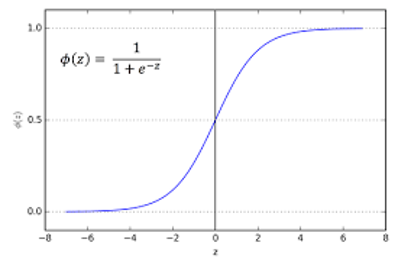

In [97]:
def sigmoid(X: np.array):
    # Apply sigmoid to X and return
    sig = (1 / (1 + np.exp(-X)))
    return sig

def sigmoid_(X: np.array):
    # return derivative of sigmoid
    sig = (1 / (1 + np.exp(-X)))
    sig_ = sig(x) * (1 - sig(x))
    return sig_

### Prediction methods

In [98]:
def predict_prob(X, W):
    # Return the class probabilities here
    return 1 / (1 + np.exp(-X).dot(W.T))

### Define the Cross entropy loss function

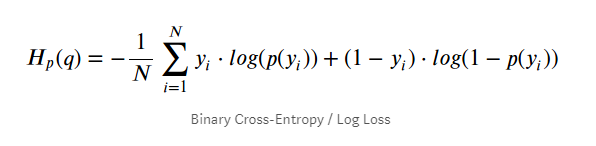

In [99]:
# Code here
def binary_cross_entropy(y, yhat):
    m = y.shape[0]

    #calculated when y=1
    y_1 = -y*np.log(yhat)

    #calculate when y=0
    y_0 = (1-y)*np.log(1-yhat)

    #concanate a per the formula
    error = y_1 - y_0

    #average error
    avg_error = error.sum() / m

    return avg_error

In [100]:
yhat = predict_prob(x_train, W)
print(yhat)


[0.01114661 0.03891513 0.0066774  0.00923205 0.00704177 0.02569548
 0.01269623 0.00769751 0.00925181 0.02096218 0.01242331 0.01988199
 0.02159511 0.00831335 0.00770315 0.02487339 0.01644057 0.02747935
 0.00688585 0.00793082 0.00677836 0.01717573 0.01341311 0.00914761
 0.01318363 0.01583648 0.00859064 0.02180659 0.00622796 0.00487249
 0.01958055 0.00797021 0.02275197 0.01970979 0.01182266 0.00600845
 0.01217244 0.00615521 0.00580045 0.01002412 0.00588606 0.0642049
 0.02804919 0.0040949  0.00855192 0.00572692 0.00374736 0.0085462
 0.00644776 0.00956133 0.01064451 0.00968209 0.00750601 0.0105298
 0.01074742 0.0233212  0.00977882 0.00681819 0.00753332 0.01460718
 0.00803234 0.00998879 0.01074918 0.01018762 0.00874501 0.00937396
 0.01265994 0.0086466  0.00721593 0.01693807 0.02151205 0.02093656
 0.01619715 0.01029631 0.01314318 0.00842642 0.02630373 0.00846808
 0.00950907 0.00551127 0.00801946 0.01090759 0.01079136 0.00634218
 0.02758831 0.00639714 0.0066059  0.00809937 0.04092938 0.0077779

In [101]:
loss = binary_cross_entropy(y_train, yhat)
print(loss)

3.0280540481928475


# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [102]:
def compute_gradient(X, y, W):
    # Code here
    dW = np.dot(X.T,predict_prob(X, W)-y) / (2 *X.shape[1])
    return dW

### Update Weights

In [103]:
# Code here

W = W - alpha*compute_gradient(x_train, y_train, W)

### Repeat for N- Iterations

In [104]:
N = 1000
losses = []
for i in range(N):
    # Predict
    yhat = predict_prob(x_train, W)
    
    # Calculate Loss
    loss = binary_cross_entropy(y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(x_train, y_train, W)
    
    # Update the weights
    W = W - alpha*dW
    
    losses.append(loss)

<ipython-input-99-dc4bb227e4f0>:9: RuntimeWarning: invalid value encountered in log
  y_0 = (1-y)*np.log(1-yhat)
<ipython-input-99-dc4bb227e4f0>:6: RuntimeWarning: invalid value encountered in log
  y_1 = -y*np.log(yhat)


### Plot the loss curve

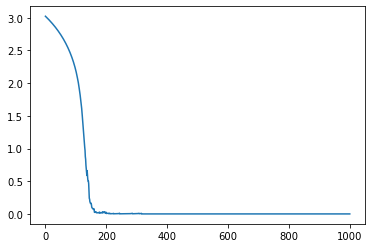

In [105]:
# Loss curve here
plt.plot(losses)
plt.show()

### Calculate the classification report and the confusion matrix

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
# Scores here
yhat = [1 if i > 0.5 else 0 for i in yhat]

confusion_matrix_1 = confusion_matrix(y_train, yhat)
classification_report_1 = classification_report(y_train, yhat)

print(confusion_matrix_1)
print(classification_report_1)

[[169   0]
 [286   0]]
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       169
           1       0.00      0.00      0.00       286

    accuracy                           0.37       455
   macro avg       0.19      0.50      0.27       455
weighted avg       0.14      0.37      0.20       455



C:\Users\yadav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [108]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.W = np.random.uniform(-1, 1, X.shape[1])

        # gradient descent
        for i in range(self.n_iter):
            # approximate y with linear combination of weights and x, plus bias
            z = np.dot(X, self.W)
            # apply sigmoid function
            y_predicted = self.sigmoid(z)

            # compute gradients
            dW= np.dot(X.T,predict_prob(X, W)-y) / (2 *X.shape[1])
            # update parameters
            self.W -= self.alpha * dW

    def predict(self, X):
        z = np.dot(X, self.W)
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def sigmoid(self , z):
         return 1 / (1 + np.exp(-z))

In [109]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
confusion_matrix_2 = confusion_matrix(y_test, predictions)
classification_report_2 = classification_report(y_test, predictions)

### Compare metrics with Sklearn's implementation

In [110]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [111]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(x_train, y_train)
sklearn_predictions = sklearn_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix_sklearn = confusion_matrix(sklearn_predictions, y_test)
classification_report_sklearn = classification_report(y_test, sklearn_predictions)

In [112]:
### compare classification report and confusion matrix here
print("Sklearn:")
print(confusion_matrix_sklearn)
print(classification_report_sklearn)
print("Ours:")
print(confusion_matrix_2)
print(classification_report_2)

Sklearn:
[[41  1]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Ours:
[[41  2]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

